# Tracing Correlation between Online Sentiment and Big Tech Stock Prices:      A Case Study of Meta's Layoff News

## Background and Motivations for Research

In stark contrast to its mid-pandemic boom, the tech industry is facing a number of challenges including rising inflation and a potential recession that constrains company spending, and increased scrutiny from regulators around the world that makes it more difficult to operate and grow.

Furthermore, chain bankruptcies in the banking industry including Silicon Valley Bank’s collapse make it difficult for tech companies to access capital for essential company operations(__[Daily Mail, 2023](https://www.dailymail.co.uk/news/article-11845803/SVB-collapse-major-impact-tech-industry.html)__). All of these factors combined have led leading tech companies like Meta, Google, and Amazon to announce mass layoffs, raising concerns about the health of the tech industry and the future of the tech workforce.

Meta was the first among Big Tech to announce mass layoffs due to rising costs, declining ad revenue, and increased competition from companies like TikTok and Snapchat (__[CNN, 2023](https://www.cnn.com/2023/04/19/tech/meta-tech-team-layoffs-begin/index.html#:~:text=Meta%20has%20said%20the%20layoffs,building%20the%20so%2Dcalled%20metaverse)__). It announced two rounds of layoffs in the past year. The first round, announced on November 9th 2022 (__[Meta, 2022](https://about.fb.com/news/2022/11/mark-zuckerberg-layoff-message-to-employees/)__), affected 11,000 employees. The second round, announced on March 14th 2023 (__[Meta, 2023](https://about.fb.com/news/2023/03/mark-zuckerberg-meta-year-of-efficiency/)__), affected 10,000 employees.

In light of such macroeconomic events, I thought it might be an interesting time to see if online sentiment of a company’s events would have an impact on its stock performance. How would investors perceive an event like mass layoffs? Do their perceptions translate into real returns in the stock market?


## Research Questions and Hypotheses
In this project, I will investigate the impact of online sentiment on the share prices of big tech companies. I use Meta’s layoffs as a case study as it was the first Big Tech company to announce mass layoffs and there was the most buzz around its decision online. My research questions are:

<ul>
<li>Does online sentiment regarding Meta's layoffs have an impact on (or at least a correlation with) Meta's share prices?</li>
<li>How do investors and the public perceive layoffs? What about a second round of layoffs?</li>
<li>Which publishers have more predictive/explanatory power?</li>
</ul>

My hypotheses are the following:
<ul>
    <li>There is a linear relationship between online sentiment expressed on Meta's layoffs news and its share prices. Negative online sentiments are expected to have a negative impact on share prices. </li>
    <li>The first round of layoffs might alarm investors (negative online sentiment) and drive down stock prices, but a second round of layoffs might signal business frugality (positive online sentiment) and lead to higher stock prices, especially as other tech companies follow through with the trend of laying off workers. </li>
    <li> Financial advisory websites like The Motley Fool and Seeking Alpha have more predictive power on the stock market than financial news outlets like The Wall Street Journal or Financial Times. That is, the trends in their online sentiments will be more closely aligned with the trends in the stock market. I hypothesize so because these websites often help retail investors buy suggesting whether to buy or sell a stock. </li>


## The Data

I use two sources of data. My historical stock price data comes from [Yahoo Finance](https://finance.yahoo.com/quote/META/history/), which describes the opening and closing stock prices of Meta for the past year. My sentiment data comes from [Aylien](https://aylien.com/product/news-api), a news scraping website similar to News API. Because I was using the free version, I was only able to scrape 100 articles per search. However, Aylien had an advantage over News API in that it allowed me to scrape articles published in 6 months ago (News API only lets you scrape articles published up to a month ago). Using Aylien’s API, I was able to access articles published by financial news outlets and financial advisory websites. Here are the publishers I specified in my API parameters:

<ul>
<li>Financial news outlets: Wall Street Journal, Reuters, Financial Times, Forbes, The Economist, Bloomberg, Yahoo! Finance, CNBC, CNN, Business Insider, and TechCrunch</li>
<li>Financial advisory websites: Market Watch, The Motley Fool, Seeking Alpha, Zacks Investment Research, Money Morning, Stock Rover, Morningstar</li>
</ul>

I filtered the articles according to date published and keywords in the title and body. For my article dates, I picked a range of 10 days (6 days before and 4 days after the layoff announcements) to see the day trends before and after the announcement. I create 4 data frames to complete my analysis. They are data frames containing data from:

<ul>
    <li>Articles on first round layoffs in November, 2022 from financial news outlets </li>
    <li>Articles on first round layoffs in November, 2022 from financial advisory websites </li>
    <li>Articles on second round layoffs in March, 2023 from financial news outlets </li>
    <li>Articles on second round layoffs in March, 2023 from financial advisory websites </li>
</ul>

Here are my code blocks for calling the Aylien API, importing the data, and storing them in data frames:

In [171]:
#Importing data

In [172]:
import pandas as pd

# read in the csv file containing stock price data
df_stock_march = pd.read_csv('Meta_stock_price.csv')
df_stock_nov = pd.read_csv('Meta_stock_price.csv')

In [173]:
import plotly.express as px

df_stock_march['Date'] = pd.to_datetime(df_stock_march['Date'])
df_stock_nov['Date'] = pd.to_datetime(df_stock_nov['Date'])

# Filter the data for March and November data
df_stock_march = df_stock_march[(df_stock_march['Date'] >= '2023-03-08') & (df_stock_march['Date'] <= '2023-03-18')]
df_stock_nov = df_stock_nov[(df_stock_nov['Date'] >= '2022-11-03') & (df_stock_nov['Date'] <= '2022-11-13')]

In [174]:
#pip install -U aylien-news-api

In [ ]:
# The following script is adapted from the Aylien “Python SDK” tutorial: https://docs.aylien.com/newsapi/sdks/#python-sdk

import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint as pp

## Configure connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '8ff61902'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = 'fdb0459ccc83ea6f127c765f41f06b37'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

## List our parameters as search operators
opts= {
    'title': 'Meta, Facebook',
    'body': 'Meta, Meta layoffs, Meta lays off, lay off, lays off, to lay off',
    'language': ['en'],
    'published_at_start': '2023-03-08T00:00:00Z',
    'published_at_end': '2023-03-18T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance',
    'source_name': ['Reuters', 'Wall Street Journal', 'The Financial Times', 'Financial Times', 'CNN', 'Forbes',
                    'The Economist', 'TechCrunch', 'Business Insider', 'Yahoo Finance', 'Bloomberg', 'CNBC']
}

try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    
    ## Print the returned story
    pp(api_response.stories)
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)

In [176]:
# The following script is adapted from the Aylien “Building Your First Searches” tutorial: https://docs.aylien.com/newsapi/Build-your-first-searches/#welcome
# The for loop is my design

import pandas as pd

# Create empty lists to store story information
titles = []
bodies = []
languages = []
published_ats = []
source_names = []
story_urls = []

# Loop through the stories list and extract information for each article
for story in api_response.stories:
    titles.append(story.title)
    bodies.append(story.body)
    languages.append(story.language)
    published_ats.append(story.published_at)
    source_names.append(story.source.name)
    story_urls.append(story.links.permalink)

# Create a pandas dataframe and convert published_ats to a datetime object
df = pd.DataFrame({
    'title': titles,
    'body': bodies,
    'language': languages,
    'published at': published_ats,
    'source name': source_names,
    'story url': story_urls,
    
})
df['date'] = pd.to_datetime(df['published at'])

# Print the dataframe
df

,title,body,language,published at,source name,story url,date
0,Meta announces more layoffs,Share Share Article via Facebook Share Article...,en,2023-03-14 18:08:17+00:00,CNBC,https://www.cnbc.com/video/2023/03/14/meta-ann...,2023-03-14 18:08:17+00:00
1,Meta's 'Year of Efficiency' Still Looks Costly,Meta CEO Mark Zuckerberg didn’t signal any int...,en,2023-03-14 16:45:00+00:00,Wall Street Journal,https://www.wsj.com/articles/metas-year-of-eff...,2023-03-14 16:45:00+00:00
2,Meta shares jump after Zuckerberg announces mo...,In this video\n\nShare Share Article via Faceb...,en,2023-03-14 18:08:31+00:00,CNBC,https://www.cnbc.com/video/2023/03/14/meta-sha...,2023-03-14 18:08:31+00:00
3,"Facebook parent Meta to lay off 10,000 more wo...",Meta (META) CEO Mark Zuckerberg announced the ...,en,2023-03-14 16:47:06+00:00,Yahoo Finance Australia,https://au.finance.yahoo.com/news/facebook-par...,2023-03-14 16:47:06+00:00
4,Facebook-parent Meta plans to lay off another ...,Facebook-parent Meta plans to lay off another ...,en,2023-03-14 15:12:43+00:00,CNN,https://edition.cnn.com/2023/03/14/tech/meta-l...,2023-03-14 15:12:43+00:00
5,Meta Ousts 1.5K HR Employees Under Its Second ...,Anusuya Lahiri · 1 min read In this article...,en,2023-03-17 14:37:58+00:00,Yahoo! Finance News,https://finance.yahoo.com/news/meta-ousts-1-5k...,2023-03-17 14:37:58+00:00
6,"Facebook parent Meta to lay off 10,000 more wo...",Yahoo Finance Live's Julie Hyman and Jared Bli...,en,2023-03-15 00:35:01+00:00,Yahoo! Finance News,https://finance.yahoo.com/news/facebook-parent...,2023-03-15 00:35:01+00:00
7,Facebook-parent Meta plans to lay off another ...,CNN —\n\nFacebook-parent Meta plans to lay off...,en,2023-03-14 15:32:50+00:00,CNN,https://us.cnn.com/2023/03/14/tech/meta-layoff...,2023-03-14 15:32:50+00:00
8,Meta could cut as much as 13% of its workforce,Share Share Article via Facebook Share Article...,en,2023-03-10 23:42:58+00:00,CNBC,https://www.cnbc.com/video/2023/03/10/meta-cou...,2023-03-10 23:42:58+00:00
9,Mark Zuckerberg says Meta is aiming to update ...,Mark Zuckerberg said during a meeting that Met...,en,2023-03-17 18:05:42+00:00,Business Insider,https://www.businessinsider.com/mark-zuckerber...,2023-03-17 18:05:42+00:00


In [177]:
import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint as pp

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '8ff61902'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = 'fdb0459ccc83ea6f127c765f41f06b37'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

In [ ]:
## List our parameters as search operators
opts= {
    'title': 'Meta, Facebook',
    'body': 'Meta layoffs, Meta lays off, lay off, lays off',
    'language': ['en'],
    'published_at_start': '2023-03-08T00:00:00Z',
    'published_at_end': '2023-03-18T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance',
    'source_name': ['Market Watch', 'The Motley Fool', 'Seeking Alpha', 
                    'Zacks', 'Zacks Investment Research','Money Morning', 'Stock Rover', 'Morningstar']
}

try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)

In [179]:
# The following script is adapted from the Aylien “Building Your First Searches” tutorial: https://docs.aylien.com/newsapi/Build-your-first-searches/#welcome
# The for loop is my design

import pandas as pd

# Create empty lists to store story information
titles = []
bodies = []
languages = []
published_ats = []
source_names = []
story_urls = []

# Loop through the stories list and extract information for each story
for story in api_response.stories:
    titles.append(story.title)
    bodies.append(story.body)
    languages.append(story.language)
    published_ats.append(story.published_at)
    source_names.append(story.source.name)
    story_urls.append(story.links.permalink)

# Create a pandas dataframe and add date column
df_advisory = pd.DataFrame({
    'title': titles,
    'body': bodies,
    'language': languages,
    'published at': published_ats,
    'source name': source_names,
    'story url': story_urls,
    
})

df_advisory['date'] = pd.to_datetime(df_advisory['published at'])

# Print the dataframe
df_advisory

,title,body,language,published at,source name,story url,date
0,": Meta to cut 10,000 more jobs in latest round...","Meta Platforms Inc. plans to lay off 10,000 mo...",en,2023-03-14 14:45:00+00:00,Market Watch,http://www.marketwatch.com/news/story.asp?guid...,2023-03-14 14:45:00+00:00
1,": Meta to cut 10,000 more jobs in latest bout ...","Meta Platforms Inc. META plans to lay off 10,0...",en,2023-03-14 13:36:08+00:00,Market Watch,http://www.marketwatch.com/news/story/meta-cut...,2023-03-14 13:36:08+00:00
2,": Meta to cut 10,000 more jobs in latest bout ...","Meta Platforms Inc. META, +5.33% plans to lay ...",en,2023-03-14 14:27:50+00:00,Market Watch,http://www.marketwatch.com/news/story/meta-cut...,2023-03-14 14:27:50+00:00
3,The Ratings Game: Meta contrasts with ‘slow an...,"Meta Platforms Inc. continues to cut jobs, and...",en,2023-03-15 12:33:00+00:00,Market Watch,http://www.marketwatch.com/news/story.asp?guid...,2023-03-15 12:33:00+00:00
4,The Ratings Game: Meta’s cost focus is ‘obviou...,The potential for further layoffs at Meta Plat...,en,2023-03-13 14:30:21+00:00,Market Watch,http://www.marketwatch.com/news/story.asp?guid...,2023-03-13 14:30:21+00:00
5,Apple Hasn't Made Layoffs. Why It's Still More...,With each major layoff announcement in the tec...,en,2023-03-15 09:57:57+00:00,Market Watch,http://www.marketwatch.com/news/story/apple-ha...,2023-03-15 09:57:57+00:00
6,Meta Platforms' Focus on Efficiency Includes A...,"Mark Zuckerberg, founder and CEO of Meta Platf...",en,2023-03-14 20:31:20+00:00,The Motley Fool,https://www.fool.com/investing/2023/03/14/meta...,2023-03-14 20:31:20+00:00
7,4 Red Flags for Meta Platforms' Future,Meta Platforms' (META -1.20%) stock has advanc...,en,2023-03-13 12:29:09+00:00,The Motley Fool,https://www.fool.com/investing/2023/03/13/4-re...,2023-03-13 12:29:09+00:00
8,Meta’s Ditching NFTs. It Sends a Stark Message...,Meta Platforms is winding down plans to push n...,en,2023-03-15 11:46:59+00:00,Market Watch,http://www.marketwatch.com/news/story/metas-di...,2023-03-15 11:46:59+00:00
9,More Meta Cuts to Come and Shareholders are Lo...,For more crisp and insightful business and eco...,en,2023-03-15 01:02:43+00:00,The Motley Fool,https://www.fool.com/investing/2023/03/14/more...,2023-03-15 01:02:43+00:00


In [180]:
import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint as pp

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '8ff61902'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = 'fdb0459ccc83ea6f127c765f41f06b37'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

In [ ]:
## List our parameters as search operators
opts= {
    'title': 'Meta, Facebook',
    'body': 'Meta, Meta layoffs, Meta lays off, lay off, lays off, to lay off',
    'language': ['en'],
    'published_at_start': '2022-11-03T00:00:00Z',
    'published_at_end': '2022-11-13T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance',
    'source_name': ['Reuters', 'Wall Street Journal', 'The Financial Times', 'Financial Times', 'CNN', 'Forbes',
                    'The Economist', 'TechCrunch', 'Business Insider', 'Yahoo Finance', 'Bloomberg', 'CNBC']
}

try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)

In [182]:
# The following script is adapted from the Aylien “Building Your First Searches” tutorial: https://docs.aylien.com/newsapi/Build-your-first-searches/#welcome
# The for loop is my design

import pandas as pd

# Create empty lists to store story information
titles = []
bodies = []
languages = []
published_ats = []
source_names = []
story_urls = []

# Loop through the stories list and extract information for each story
for story in api_response.stories:
    titles.append(story.title)
    bodies.append(story.body)
    languages.append(story.language)
    published_ats.append(story.published_at)
    source_names.append(story.source.name)
    story_urls.append(story.links.permalink)

# Create a pandas dataframe and convert published_ats to a datetime object
df_nov = pd.DataFrame({
    'title': titles,
    'body': bodies,
    'language': languages,
    'published at': published_ats,
    'source name': source_names,
    'story url': story_urls,
    
})
df_nov['date'] = pd.to_datetime(df_nov['published at'])

# Print the dataframe
df_nov

,title,body,language,published at,source name,story url,date
0,Mark Zuckerberg apologized for over-investing ...,Mark Zuckerberg apologized to employees as he ...,en,2022-11-09 12:38:30+00:00,Business Insider,https://www.businessinsider.com/mark-zuckerber...,2022-11-09 12:38:30+00:00
1,"Meta is laying off more than 11,000 employees",Meta is reducing the size of its workforce by ...,en,2022-11-09 11:18:11+00:00,Yahoo Finance Australia,https://au.finance.yahoo.com/news/meta-mass-la...,2022-11-09 11:18:11+00:00
2,"Meta to lay off 13% of the workforce, extends ...",Facebook's parent company Meta plans to lay of...,en,2022-11-09 13:02:12+00:00,CNBC,https://www.cnbc.com/video/2022/11/09/meta-to-...,2022-11-09 13:02:12+00:00
3,Meta shares rise after Facebook parent lays of...,Meta Platforms shares rose in premarket tradin...,en,2022-11-09 12:53:08+00:00,Business Insider,https://markets.businessinsider.com/news/stock...,2022-11-09 12:53:08+00:00
4,Mark Zuckerberg says some Meta employees will ...,Mark Zuckerberg on Wednesday said that some Me...,en,2022-11-09 13:18:43+00:00,Business Insider,https://www.businessinsider.com/mark-zuckerber...,2022-11-09 13:18:43+00:00
5,Meta adds to a brutal year of layoffs in tech,"The job cuts in tech land are piling up, as co...",en,2022-11-09 20:32:07+00:00,CNBC,https://www.cnbc.com/2022/11/09/tech-layoffs-2...,2022-11-09 20:32:07+00:00
6,"This is not the end of Meta's layoffs, says Ji...",CNBC's Jim Cramer and the 'Squawk on the Stree...,en,2022-11-09 17:08:00+00:00,Squawk on the Street (CNBC),https://www.cnbc.com/video/2022/11/09/this-is-...,2022-11-09 17:08:00+00:00
7,"Engadget Podcast: A foldable iPhone, Meta layo...",We’re still waiting for Apple to deliver a gen...,en,2022-11-11 14:13:19+00:00,Yahoo Finance Australia,https://au.finance.yahoo.com/news/engadget-pod...,2022-11-11 14:13:19+00:00
8,Meta Reportedly Preparing ‘Large-Scale' Job Cu...,Facebook's parent company Meta is planning to ...,en,2022-11-06 21:25:21+00:00,Forbes,https://www.forbes.com/sites/brianbushard/2022...,2022-11-06 21:25:21+00:00
9,"‘Sad, hurt, uncertain, disappointed, and now j...",Former Meta employees are swarming to social m...,en,2022-11-09 17:38:48+00:00,Business Insider,https://www.businessinsider.com/meta-employees...,2022-11-09 17:38:48+00:00


In [183]:
import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint as pp

## Configure your connection to the API
configuration = aylien_news_api.Configuration()
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '8ff61902'
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = 'fdb0459ccc83ea6f127c765f41f06b37'
configuration.host = "https://api.aylien.com/news"
api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))

In [ ]:
## List our parameters as search operators
opts= {
    'title': 'Meta, Facebook',
    'body': 'Meta layoffs, Meta lays off, lay off, lays off',
    'language': ['en'],
    'published_at_start': '2022-11-03T00:00:00Z',
    'published_at_end': '2022-11-13T00:00:00Z',
    'per_page': 100,
    'sort_by': 'relevance',
    'source_name': ['Market Watch', 'The Motley Fool', 'Seeking Alpha', 
                    'Zacks', 'Zacks Investment Research','Money Morning', 'Stock Rover', 'Morningstar']
}

try:
    ## Make a call to the Stories endpoint for stories that meet the criteria of the search operators
    api_response = api_instance.list_stories(**opts)
    ## Print the returned story
    pp(api_response.stories)
except ApiException as e:
    print('Exception when calling DefaultApi->list_stories: %s\n' % e)

In [185]:
# The following script is adapted from the Aylien “Building Your First Searches” tutorial: https://docs.aylien.com/newsapi/Build-your-first-searches/#welcome
# The for loop is my design

import pandas as pd

# Create empty lists to store story information
titles = []
bodies = []
languages = []
published_ats = []
source_names = []
story_urls = []

# Loop through the stories list and extract information for each story
for story in api_response.stories:
    titles.append(story.title)
    bodies.append(story.body)
    languages.append(story.language)
    published_ats.append(story.published_at)
    source_names.append(story.source.name)
    story_urls.append(story.links.permalink)

# Create a pandas dataframe and add date column
df_advisory_nov = pd.DataFrame({
    'title': titles,
    'body': bodies,
    'language': languages,
    'published at': published_ats,
    'source name': source_names,
    'story url': story_urls,
    
})

df_advisory_nov['date'] = pd.to_datetime(df_advisory_nov['published at'])

# Print the dataframe
df_advisory_nov

,title,body,language,published at,source name,story url,date
0,"Meta to lay off more than 11,000 employees, or...",Meta Platforms Inc. Chief Executive Mark Zuck...,en,2022-11-09 12:01:03+00:00,Market Watch,http://www.marketwatch.com/news/story/meta-lay...,2022-11-09 12:01:03+00:00
1,Facebook parent Meta begins mass layoffs of 11...,Massive layoffs at Meta Platforms Inc. began W...,en,2022-11-09 12:36:00+00:00,Market Watch,https://www.marketwatch.com/story/facebook-par...,2022-11-09 12:36:00+00:00
2,Meta Is Spending Like an Oil Company. That Nee...,Now that Meta Platforms reportedly is planning...,en,2022-11-08 13:45:57+00:00,Market Watch,https://www.marketwatch.com/articles/meta-plat...,2022-11-08 13:45:57+00:00
3,Meta starts laying off 13% of staff ￼,For more crisp and insightful business and eco...,en,2022-11-09 19:08:03+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/09/meta...,2022-11-09 19:08:03+00:00
4,Facebook parent Meta expected to announce mass...,Meta Platforms Inc. is planning to begin large...,en,2022-11-06 21:19:03+00:00,Market Watch,https://www.marketwatch.com/story/facebook-par...,2022-11-06 21:19:03+00:00
5,Why Meta Platforms and Tesla Shares Went in Op...,Investors were pleased to see upward momentum ...,en,2022-11-08 01:25:59+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/07/why-...,2022-11-08 01:25:59+00:00
6,Why Meta Platforms Stock Popped This Week,What happened\n\nShares of Meta Platforms (MET...,en,2022-11-11 18:32:07+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/11/why-...,2022-11-11 18:32:07+00:00
7,2 Terrible Reasons to Buy Meta Platforms Stock,Meta Platforms (META -0.26%) stock collapsed a...,en,2022-11-09 13:31:25+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/09/2-te...,2022-11-09 13:31:25+00:00
8,Why Meta Platforms Stock Bounced Wednesday Mor...,What happened\n\nShares of Meta Platforms (MET...,en,2022-11-09 18:45:43+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/09/why-...,2022-11-09 18:45:43+00:00
9,"Why FAANG Stocks Alphabet, Meta Platforms, and...",What happened\n\nFAANG stocks Alphabet (GOOG 7...,en,2022-11-10 19:12:32+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/10/why-...,2022-11-10 19:12:32+00:00


## Data Cleansing and Exploration Using Word Clouds and Topic Modeling
Before I dive into sentiment analysis, I clean up my data using the Pandas Python library checking for duplicates and missing values. I already converted my dates into datatime format when I created the data frames. I also clean and normaliz the text data using the NLTK Python library, removing punctuation, lowercasing the letters, removing the stop words, and stemming the text.

After cleaning up my data, I store the articles in text files grouped by publisher (source). I do some data exploring using words clouds and topic modeling. By looking at the words clouds and the topics being extracted, we can see that most of the articles we extracted are related to Meta’s layoffs. The code blocks below provide the script for accomplishing this process.

In [186]:
# Check for duplicates
df.drop_duplicates(inplace=True)
df_advisory.drop_duplicates(inplace=True)
df_nov.drop_duplicates(inplace=True)
df_advisory_nov.drop_duplicates(inplace=True)

# Check for missing values
df.dropna(inplace=True)
df_nov.dropna(inplace=True)
df_advisory.dropna(inplace=True)
df_advisory_nov.dropna(inplace=True)

In [187]:
directory_path = "C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project/"

In [188]:
# The following script is adapted from our web scraping curriculum: https://github.com/rskrisel/web_scraping_workshop
import nltk

from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud    
import matplotlib.pyplot as plt

import glob
import os
from pathlib import Path

In [189]:
# The following script is adapted from our web scraping curriculum: https://github.com/rskrisel/web_scraping_workshop
# Iterate over unique source names in the dataframe
for source_name in df['source name'].unique():
    # Create a new dataframe for the current source
    df_source = df[df['source name'] == source_name]

    # Concatenate the 'body' column from df_nov to the current source's text
    if source_name in df_nov['source name'].unique():
        df_nov_source = df_nov[df_nov['source name'] == source_name]
        source_text = ' '.join(list(df_nov_source['body']) + list(df_source['body']))
    else:
        source_text = ' '.join(list(df_source['body']))
    
    # Save the source text to a text file with the source name as the file name
    file_name = f"{source_name}.txt"
    with open(file_name, "w", encoding="utf-8") as f:
        f.write(source_text)
        
# Do the same for advisory websites: Iterate over unique source names in the dataframe
for source_name in df_advisory['source name'].unique():
    # Create a new dataframe for the current source
    df_adviosory_nov_source = df_advisory[df_advisory['source name'] == source_name]

    # Concatenate the 'body' column from df_nov to the current source's text
    if source_name in df_advisory_nov['source name'].unique():
        df_advisory_nov_source = df_advisory_nov[df_advisory_nov['source name'] == source_name]
        source_text_advisory = ' '.join(list(df_advisory_nov_source['body']) + list(df_advisory_nov_source['body']))
    else:
        source_text_advisory = ' '.join(list(df_advisory_source['body']))
    
    # Save the source text to a text file with the source name as the file name
    file_name = f"{source_name}.txt"
    with open(file_name, "w", encoding="utf-8") as f:
        f.write(source_text_advisory)

In [190]:
# The following script is adapted from our web scraping curriculum: https://github.com/rskrisel/web_scraping_workshop
if os.path.exists('df_advisory.txt'):
    os.remove('df_advisory.txt')
#use glob and Path to make a list of all the filepaths in that directory and a list of all the short story titles.
text_files = glob.glob(f"{directory_path}/*.txt")
text_files

['C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Business Insider.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\CNBC.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\CNN.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Forbes.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Market Watch.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Morningstar.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Reuters.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Seeking Alpha.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\The Motley Fool.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Wall Street Journal.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Yahoo Finance Australia.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Yahoo! Finance News.txt']

In [191]:
text_titles = [Path(text).stem for text in text_files]
text_titles

['Business Insider',
 'CNBC',
 'CNN',
 'Forbes',
 'Market Watch',
 'Morningstar',
 'Reuters',
 'Seeking Alpha',
 'The Motley Fool',
 'Wall Street Journal',
 'Yahoo Finance Australia',
 'Yahoo! Finance News']

In [192]:
# Merge all the text files into one file to make a word cloud

# Get a list of all text files in the directory
file_list = glob.glob(directory_path + "*.txt")

# Combine the contents of all text files into a single string
combined_text = ""
for file_path in file_list:
    with open(file_path, encoding="utf-8") as f:
        file_text = f.read()
        combined_text += file_text

# Write the combined text to a new file
with open("combined_text.txt", "w", encoding="utf-8") as f:
    f.write(combined_text)
    
if os.path.exists('combined_text.txt'):
    os.remove('combined_text.txt')
#use glob and Path to make a list of all the filepaths in that directory and a list of all the short story titles.
text_files = glob.glob(f"{directory_path}/*.txt")
text_files

['C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Business Insider.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\CNBC.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\CNN.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Forbes.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Market Watch.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Morningstar.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Reuters.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Seeking Alpha.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\The Motley Fool.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Wall Street Journal.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Yahoo Finance Australia.txt',
 'C:/Users/82106/OneDrive/바탕 화면/Text Analysis Final Project\\Yahoo! Finance News.txt']

In [193]:
#Create two new folders to save cleaned files and another to save word cloud outputs
#! mkdir files_cleaned
#! mkdir wordclouds

In [114]:
# The following script is adapted from our web scraping curriculum: https://github.com/rskrisel/web_scraping_workshop
# Fcn source: https://medium.com/codex/a-beginners-guide-to-easily-create-a-word-cloud-in-python-7c3078c705b7
# and https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

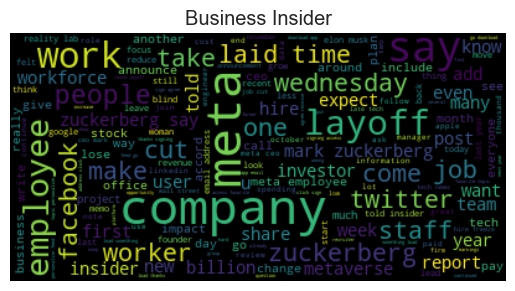

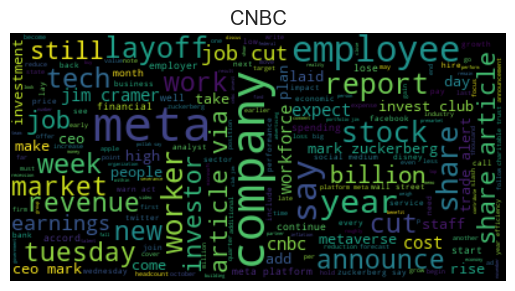

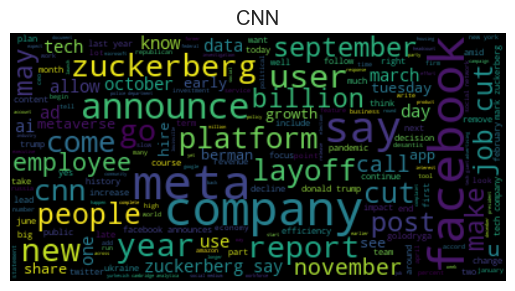

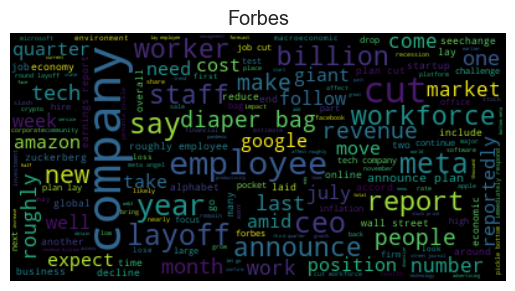

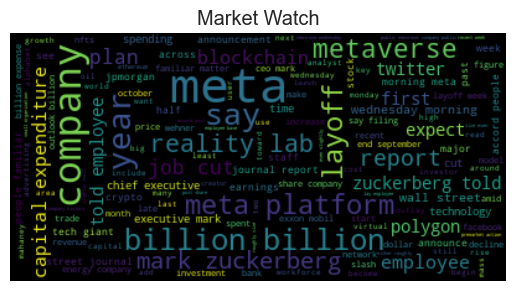

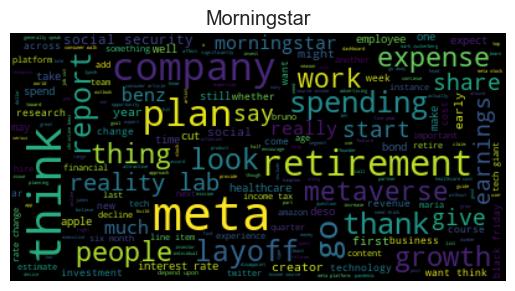

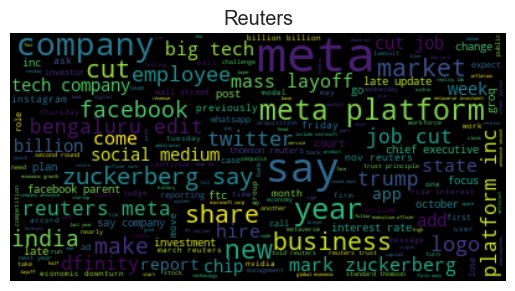

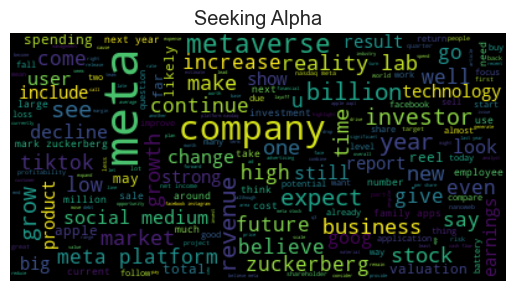

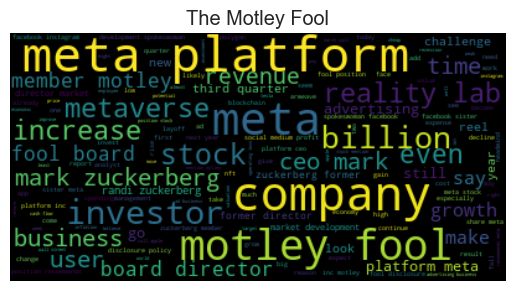

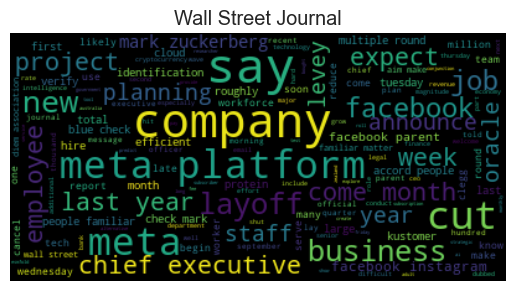

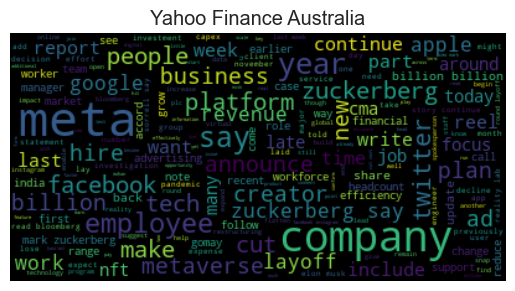

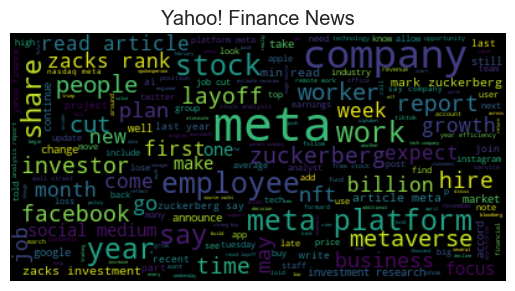

In [128]:
# The following script is adapted from our web scraping curriculum: https://github.com/rskrisel/web_scraping_workshop

#clean text
id = 0
lexical_density = []  
for filepath in text_files:
    source = os.path.splitext(os.path.basename(filepath))[0]
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
    
    # save cleaned files
    id += 1
    with open(f"files_cleaned/article_cleaned_{id}.txt", "w") as file:
        file.write(str(text_clean))

    # create Word Clouds
    unique_string = (" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40).generate(unique_string)

    plt.figure()
    plt.title(source)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # save Word Clouds
    id += 1
    wordcloud.to_file(f"wordclouds/word_cloud_{id}.png")




When we print out our word clouds, we see keywords like ‘Meta’, ‘Facebook’, ‘layoffs’, ‘employee’, ‘revenue’, ‘cut’, ‘share’, ‘stock’, and ‘Mark Zuckerberg’. Since we want to find articles related to Meta and their layoffs, this is what we want to see.

In [129]:
# The following script is adapted from our web scraping curriculum: https://github.com/rskrisel/topic_modeling_workshop
import tomotopy as tp
import seaborn
from pathlib import Path
from nltk.corpus import stopwords

stops = stopwords.words('english')
training_data = []
original_texts = []
titles = []

for file in text_files:
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalpha()]
    text_stops = [t for t in text_lower if t not in stops]
    text_string = ' '.join(text_stops)
    training_data.append(text_string)
    original_texts.append(text)
    titles.append(Path(file).stem)
    
# Number of topics to return
num_topics = 10

# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after removing white space (strip) 
# and splitting it up into words (split)
for text in training_data:
    model.add_doc(text.strip().split())
    
# The log-likelihood function is typically used to 
# derive the maximum likelihood estimator of the parameter  
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -8.793810929545211
Iteration: 10	Log-likelihood: -8.443442440032959
Iteration: 20	Log-likelihood: -8.338402535764896
Iteration: 30	Log-likelihood: -8.27486684005371
Iteration: 40	Log-likelihood: -8.24039650242388
Iteration: 50	Log-likelihood: -8.21541397725667
Iteration: 60	Log-likelihood: -8.193769289652064
Iteration: 70	Log-likelihood: -8.176796993725796
Iteration: 80	Log-likelihood: -8.158544232315057
Iteration: 90	Log-likelihood: -8.150371324082418

Topic Model Results:


✨Topic 0✨

quarter employees expenses could last number another amazon vr need

✨Topic 1✨

meta business stock platforms market company apple labs earnings still

✨Topic 2✨

meta billion company year metaverse tech would layoffs also reported

✨Topic 3✨

platforms fool motley facebook zuckerberg investors stock positions quarter ceo

✨Topic 4✨

metaverse meta reality growth investors revenue price company billion advertising

✨Topic 5✨

one next would users fa

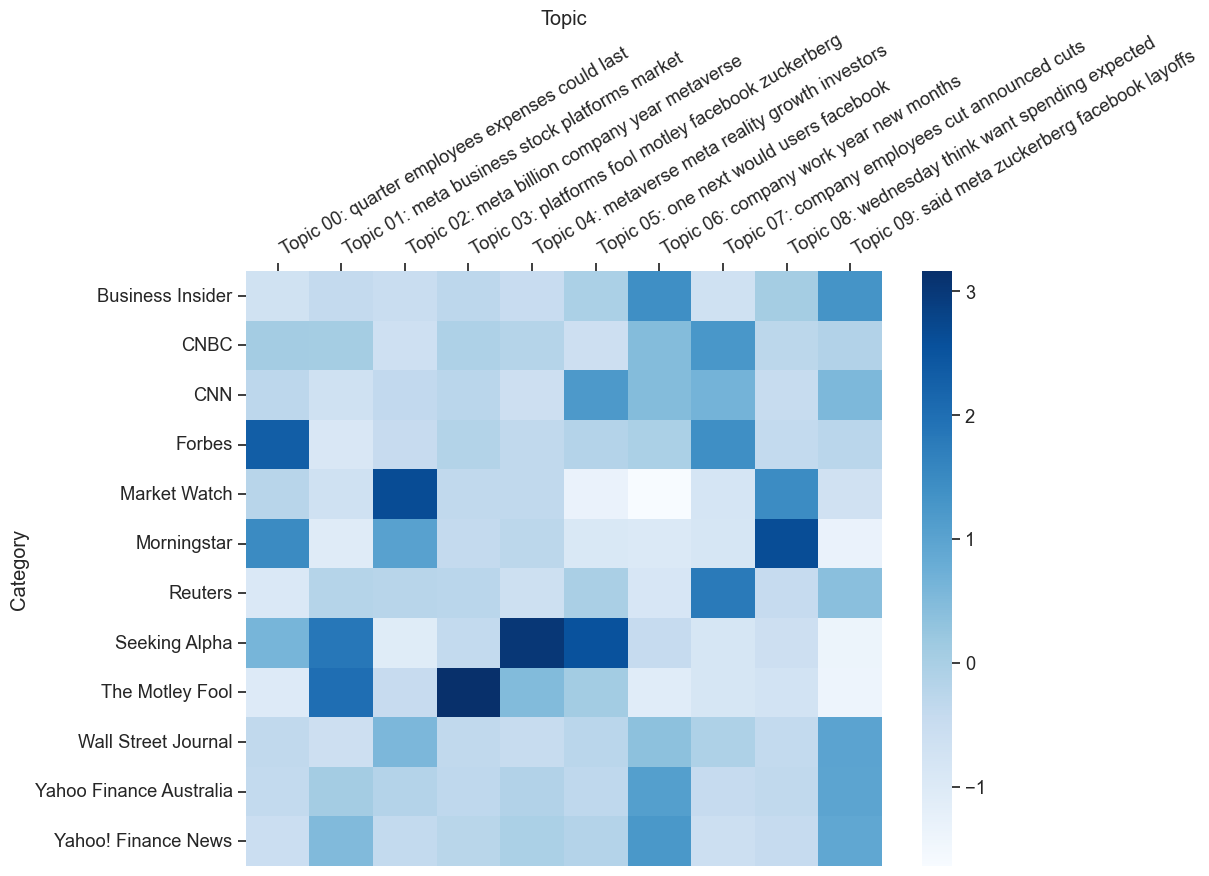

In [130]:
# The following script is adapted from our web scraping curriculum: https://github.com/rskrisel/topic_modeling_workshop
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels, 
                                      topic_distributions, 
                                      topic_keys, 
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):
    
    # Combine the labels and distributions into a list of dictionaries.
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', 
                                     columns='Topic', 
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
        
    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)    
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()
    
target_labels = titles
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous    

Running a topic modeling analysis gives us similar results. All topics extracted seem to reflect the topics we’re interested in. Although the topic modeling exercise signals that we’re on track and we extracted the right kind of data, it doesn’t really offer us any diversity in terms of topics. It’s just repeating the same kind of topics over and over again. 

Let’s move on to sentiment analysis, which will give us more insight into what online sentiment is like regarding Meta’s decision.


## Sentiment Analysis
I decided to conduct separate analyses on financial news provider sentiment and financial advisory website sentiment to see if one of them offers better descriptive power with regards to stock prices. For example, sentiment trends on financial advisory websites might be more closely aligned with stock price trends across the week than that of news outlets. In that case, I would conclude that financial advisory websites like The Motley Fool or Money Watch are better at explaining (and potentially influencing) stock prices than news outlets like The Wall Street Journal.

I calculate sentiment scores across each article published using VADER as we did in class, which returns a compound score between -1 (very negative) and 1 (very positive). I then add the compound sentiment score as a column in the data frames we created. 

I visualize the data frames using plotly express. Trend lines may be cut off when data is missing on that date. This might happen when the stock market is closed or if no articles about Meta were published on that date. 


In [194]:
# The following script is adapted from our sentiment analysis class curriculum: https://github.com/rskrisel/sentiment_analysis_workshop
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

def calculate_sentiment(text):
    scores = sentimentAnalyser.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

In [195]:
#Sentiment Analysis for November 2022 (first round of layoffs)

### Sentiment Analysis for First Round Layoffs in Nov, 2022
Let’s first take a look at how the trends in sentiment scores and share prices compare around the time when the first round of layoffs was announced. Note that the market was closed Nov 12-13th 2022. 

In [196]:
#adding sentiment scores to the dataframe
df_nov['sentiment score'] = df_nov['body'].apply(calculate_sentiment)
df_nov

,title,body,language,published at,source name,story url,date,sentiment score
0,Mark Zuckerberg apologized for over-investing ...,Mark Zuckerberg apologized to employees as he ...,en,2022-11-09 12:38:30+00:00,Business Insider,https://www.businessinsider.com/mark-zuckerber...,2022-11-09 12:38:30+00:00,-0.2679
1,"Meta is laying off more than 11,000 employees",Meta is reducing the size of its workforce by ...,en,2022-11-09 11:18:11+00:00,Yahoo Finance Australia,https://au.finance.yahoo.com/news/meta-mass-la...,2022-11-09 11:18:11+00:00,-0.8173
2,"Meta to lay off 13% of the workforce, extends ...",Facebook's parent company Meta plans to lay of...,en,2022-11-09 13:02:12+00:00,CNBC,https://www.cnbc.com/video/2022/11/09/meta-to-...,2022-11-09 13:02:12+00:00,0.0000
3,Meta shares rise after Facebook parent lays of...,Meta Platforms shares rose in premarket tradin...,en,2022-11-09 12:53:08+00:00,Business Insider,https://markets.businessinsider.com/news/stock...,2022-11-09 12:53:08+00:00,-0.9459
4,Mark Zuckerberg says some Meta employees will ...,Mark Zuckerberg on Wednesday said that some Me...,en,2022-11-09 13:18:43+00:00,Business Insider,https://www.businessinsider.com/mark-zuckerber...,2022-11-09 13:18:43+00:00,0.7168
5,Meta adds to a brutal year of layoffs in tech,"The job cuts in tech land are piling up, as co...",en,2022-11-09 20:32:07+00:00,CNBC,https://www.cnbc.com/2022/11/09/tech-layoffs-2...,2022-11-09 20:32:07+00:00,-0.9928
6,"This is not the end of Meta's layoffs, says Ji...",CNBC's Jim Cramer and the 'Squawk on the Stree...,en,2022-11-09 17:08:00+00:00,Squawk on the Street (CNBC),https://www.cnbc.com/video/2022/11/09/this-is-...,2022-11-09 17:08:00+00:00,0.2960
7,"Engadget Podcast: A foldable iPhone, Meta layo...",We’re still waiting for Apple to deliver a gen...,en,2022-11-11 14:13:19+00:00,Yahoo Finance Australia,https://au.finance.yahoo.com/news/engadget-pod...,2022-11-11 14:13:19+00:00,-0.5463
8,Meta Reportedly Preparing ‘Large-Scale' Job Cu...,Facebook's parent company Meta is planning to ...,en,2022-11-06 21:25:21+00:00,Forbes,https://www.forbes.com/sites/brianbushard/2022...,2022-11-06 21:25:21+00:00,-0.9988
9,"‘Sad, hurt, uncertain, disappointed, and now j...",Former Meta employees are swarming to social m...,en,2022-11-09 17:38:48+00:00,Business Insider,https://www.businessinsider.com/meta-employees...,2022-11-09 17:38:48+00:00,0.9804


In [197]:
import plotly
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<module 'plotly.version' from 'C:\\Users\\82106\\anaconda3\\lib\\site-packages\\plotly\\version.py'>


In [198]:
# The following script is adapted from Plotly Graphing Libraries “Multiple Axes in Python” tutorial: https://plotly.com/python/multiple-axes/#two-y-axes
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_nov.set_index('date', inplace=True)

# Resample the sentiment scores to daily frequency
daily_sentiment_nov = df_nov['sentiment score'].resample('D').mean().reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=daily_sentiment_nov['date'], y=daily_sentiment_nov['sentiment score'], name="Sentiment Score"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_stock_nov['Date'], y=df_stock_nov['Close'], name="Stock Price"),
    secondary_y=True,
)

# Add vertical line for layoff announcement
fig.add_shape(
    dict(
        type="line",
        x0='2022-11-09',
        y0=-1,
        x1='2022-11-09',
        y1=1,
        line=dict(color='black', width=1, dash='dot'),
    )
)

# Add label for layoff announcement
fig.add_annotation(
    dict(
        x='2022-11-09',
        y=0.7,
        xref="x", yref="y", text="Layoff Announcement",
        showarrow=True,
        font=dict(size=12, color='black'),
        align="center", 
        arrowhead=2, arrowsize=1, arrowwidth=2,arrowcolor='black',
        ax=0, ay=-30,
        bordercolor='black', borderwidth=1,borderpad=4,
        bgcolor='white',
        opacity=0.8
    )
)

# Add figure title
fig.update_layout(
    title_text="Layoff Sentiment in Financial News (First Round of Layoffs)"
)

# Set x-axis title
fig.update_xaxes(title_text="Date (Market closed Nov 12-13)")

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment Score (compound)", secondary_y=False, range = [-1, 1])
fig.update_yaxes(title_text="Stock Price ($)", secondary_y=True, range = [80, 140])

fig.show(renderer='iframe')


Here’s a visualization for financial news sentiment vs. stock prices first. It seems that there’s been some fluctuation in sentiment during the week of the layoffs announcement. While sentiment regarding Meta was negative (-0.377) on Nov 8th,  a day before the layoffs were announced, it shot up to 0.277 on Nov 9th and dropped down the next day to stayed neutral for the next two days. During the same time frame, share prices increased dramatically. Meta shares closed at \\$101.47 on Nov 9th, a 5\% increase from the previous day’s closing price of \\$96.47. The next day it increased a further 10\% to \\$111.87. 

Let's continue and look at a similar visualization, this time for financial advisory websites.

In [199]:
#adding sentiment scores to the advisory website dataframe
df_advisory_nov['sentiment score'] = df_advisory_nov['body'].apply(calculate_sentiment)
df_advisory_nov

,title,body,language,published at,source name,story url,date,sentiment score
0,"Meta to lay off more than 11,000 employees, or...",Meta Platforms Inc. Chief Executive Mark Zuck...,en,2022-11-09 12:01:03+00:00,Market Watch,http://www.marketwatch.com/news/story/meta-lay...,2022-11-09 12:01:03+00:00,-0.8043
1,Facebook parent Meta begins mass layoffs of 11...,Massive layoffs at Meta Platforms Inc. began W...,en,2022-11-09 12:36:00+00:00,Market Watch,https://www.marketwatch.com/story/facebook-par...,2022-11-09 12:36:00+00:00,-0.9665
2,Meta Is Spending Like an Oil Company. That Nee...,Now that Meta Platforms reportedly is planning...,en,2022-11-08 13:45:57+00:00,Market Watch,https://www.marketwatch.com/articles/meta-plat...,2022-11-08 13:45:57+00:00,0.9963
3,Meta starts laying off 13% of staff ￼,For more crisp and insightful business and eco...,en,2022-11-09 19:08:03+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/09/meta...,2022-11-09 19:08:03+00:00,0.8706
4,Facebook parent Meta expected to announce mass...,Meta Platforms Inc. is planning to begin large...,en,2022-11-06 21:19:03+00:00,Market Watch,https://www.marketwatch.com/story/facebook-par...,2022-11-06 21:19:03+00:00,-0.1280
5,Why Meta Platforms and Tesla Shares Went in Op...,Investors were pleased to see upward momentum ...,en,2022-11-08 01:25:59+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/07/why-...,2022-11-08 01:25:59+00:00,0.7592
6,Why Meta Platforms Stock Popped This Week,What happened\n\nShares of Meta Platforms (MET...,en,2022-11-11 18:32:07+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/11/why-...,2022-11-11 18:32:07+00:00,0.9344
7,2 Terrible Reasons to Buy Meta Platforms Stock,Meta Platforms (META -0.26%) stock collapsed a...,en,2022-11-09 13:31:25+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/09/2-te...,2022-11-09 13:31:25+00:00,0.8222
8,Why Meta Platforms Stock Bounced Wednesday Mor...,What happened\n\nShares of Meta Platforms (MET...,en,2022-11-09 18:45:43+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/09/why-...,2022-11-09 18:45:43+00:00,-0.8496
9,"Why FAANG Stocks Alphabet, Meta Platforms, and...",What happened\n\nFAANG stocks Alphabet (GOOG 7...,en,2022-11-10 19:12:32+00:00,The Motley Fool,https://www.fool.com/investing/2022/11/10/why-...,2022-11-10 19:12:32+00:00,0.9914


In [200]:
# The following script is adapted from Plotly Graphing Libraries “Multiple Axes in Python” tutorial: https://plotly.com/python/multiple-axes/#two-y-axes

import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_advisory_nov.set_index('date', inplace=True)

# Resample the sentiment scores to daily frequency
daily_sentiment_adv_nov = df_advisory_nov['sentiment score'].resample('D').mean().reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=daily_sentiment_adv_nov['date'], y=daily_sentiment_adv_nov['sentiment score'], name="Sentiment Score"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_stock_nov['Date'], y=df_stock_nov['Close'], name="Stock Price"),
    secondary_y=True,
)

# Add vertical line for layoff announcement
fig.add_shape(
    dict(
        type="line",
        x0='2022-11-09',
        y0=-1,
        x1='2022-11-09',
        y1=1,
        line=dict(color='black', width=1, dash='dot'),
    )
)

# Add label for layoff announcement
fig.add_annotation(
    dict(
        x='2022-11-09',
        y=0.7,
        xref="x", yref="y", text="Layoff Announcement",
        showarrow=True,
        font=dict(size=12, color='black'),
        align="center", 
        arrowhead=2, arrowsize=1, arrowwidth=2,arrowcolor='black',
        ax=0, ay=-30,
        bordercolor='black', borderwidth=1,borderpad=4,
        bgcolor='white',
        opacity=0.8
    )
)

# Add figure title
fig.update_layout(
    title_text="Layoff Sentiment in Financial Advisory Pages (First Round of Layoffs)"
)

# Set x-axis title
fig.update_xaxes(title_text="Date (Market closed Nov 12-13)")

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment Score (compound)", secondary_y=False, range = [-1, 1])
fig.update_yaxes(title_text="Stock Price ($)", secondary_y=True, range = [80, 140])

fig.show(renderer='iframe')


Although there has been  fluctuation in sentiment during the week, sentiment stayed positive on large and only dropped to negative on Nov 12th. Sentiment scores dropped to 0.083 on Nov 9th when layoffs were announced but came back up to 0.509 on Nov 10th and continued to hike on Nov 11th. Contrary to news sentiment, advisory website sentiment decreased sharply when layoffs were announced but immediately rebounded to follow a similar trend with stock prices.

### Sentiment Analysis for Second Round Layoffs in March, 2023
What about a second round of layoffs? Let’s look at how the trends in sentiment scores and share prices were like in March 2023, when the second round of layoffs were announced by Meta. Note that the market was closed March 11-12th 2023. 

In [201]:
#adding sentiment scores to the dataframe
df['sentiment score'] = df['body'].apply(calculate_sentiment)
df

,title,body,language,published at,source name,story url,date,sentiment score
0,Meta announces more layoffs,Share Share Article via Facebook Share Article...,en,2023-03-14 18:08:17+00:00,CNBC,https://www.cnbc.com/video/2023/03/14/meta-ann...,2023-03-14 18:08:17+00:00,0.8402
1,Meta's 'Year of Efficiency' Still Looks Costly,Meta CEO Mark Zuckerberg didn’t signal any int...,en,2023-03-14 16:45:00+00:00,Wall Street Journal,https://www.wsj.com/articles/metas-year-of-eff...,2023-03-14 16:45:00+00:00,0.5423
2,Meta shares jump after Zuckerberg announces mo...,In this video\n\nShare Share Article via Faceb...,en,2023-03-14 18:08:31+00:00,CNBC,https://www.cnbc.com/video/2023/03/14/meta-sha...,2023-03-14 18:08:31+00:00,0.8807
3,"Facebook parent Meta to lay off 10,000 more wo...",Meta (META) CEO Mark Zuckerberg announced the ...,en,2023-03-14 16:47:06+00:00,Yahoo Finance Australia,https://au.finance.yahoo.com/news/facebook-par...,2023-03-14 16:47:06+00:00,0.9896
4,Facebook-parent Meta plans to lay off another ...,Facebook-parent Meta plans to lay off another ...,en,2023-03-14 15:12:43+00:00,CNN,https://edition.cnn.com/2023/03/14/tech/meta-l...,2023-03-14 15:12:43+00:00,0.5701
5,Meta Ousts 1.5K HR Employees Under Its Second ...,Anusuya Lahiri · 1 min read In this article...,en,2023-03-17 14:37:58+00:00,Yahoo! Finance News,https://finance.yahoo.com/news/meta-ousts-1-5k...,2023-03-17 14:37:58+00:00,0.9342
6,"Facebook parent Meta to lay off 10,000 more wo...",Yahoo Finance Live's Julie Hyman and Jared Bli...,en,2023-03-15 00:35:01+00:00,Yahoo! Finance News,https://finance.yahoo.com/news/facebook-parent...,2023-03-15 00:35:01+00:00,0.9891
7,Facebook-parent Meta plans to lay off another ...,CNN —\n\nFacebook-parent Meta plans to lay off...,en,2023-03-14 15:32:50+00:00,CNN,https://us.cnn.com/2023/03/14/tech/meta-layoff...,2023-03-14 15:32:50+00:00,0.9600
8,Meta could cut as much as 13% of its workforce,Share Share Article via Facebook Share Article...,en,2023-03-10 23:42:58+00:00,CNBC,https://www.cnbc.com/video/2023/03/10/meta-cou...,2023-03-10 23:42:58+00:00,0.7845
9,Mark Zuckerberg says Meta is aiming to update ...,Mark Zuckerberg said during a meeting that Met...,en,2023-03-17 18:05:42+00:00,Business Insider,https://www.businessinsider.com/mark-zuckerber...,2023-03-17 18:05:42+00:00,0.9937


In [202]:
# The following script is adapted from Plotly Graphing Libraries “Multiple Axes in Python” tutorial: https://plotly.com/python/multiple-axes/#two-y-axes

import plotly.graph_objects as go
from plotly.subplots import make_subplots

df.set_index('date', inplace=True)

# Resample the sentiment scores to daily frequency
daily_sentiment = df['sentiment score'].resample('D').mean().reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=daily_sentiment['date'], y=daily_sentiment['sentiment score'], name="Sentiment Score"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_stock_march['Date'], y=df_stock_march['Close'], name="Stock Price"),
    secondary_y=True,
)

# Add vertical line for layoff announcement
fig.add_shape(
    dict(
        type="line",
        x0='2023-03-14',
        y0=-1,
        x1='2023-03-14',
        y1=1,
        line=dict(color='black', width=1, dash='dot'),
    )
)

# Add label for layoff announcement
fig.add_annotation(
    dict(
        x='2023-03-14',
        y=0.8,
        xref="x", yref="y", text="Layoff Announcement",
        showarrow=True,
        font=dict(size=12, color='black'),
        align="center", 
        arrowhead=2, arrowsize=1, arrowwidth=2,arrowcolor='black',
        ax=0, ay=-30,
        bordercolor='black', borderwidth=1,borderpad=4,
        bgcolor='white',
        opacity=0.8
    )
)

# Add figure title
fig.update_layout(
    title_text="Layoff Sentiment in Financial News"
)

# Set x-axis title
fig.update_xaxes(title_text="Date (Market closed Mar 11-12)")

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment Score (compound)", secondary_y=False, range = [-1, 1])
fig.update_yaxes(title_text="Stock Price ($)", secondary_y=True, range = [170, 230])

fig.show(renderer='iframe')


Here’s a visualization for financial news sentiment vs. stock prices in March. Sentiment scores dropped slightly to 0.692 on March 14th when layoffs were announced but rose again in the coming days and stayed much positive overall compared to the initial layoffs in November. During the same time frame, share prices increased dramatically. Meta shares closed at \\$194.02 on March 14th, a 7.25% increase from the previous day’s closing price of \\$180.90. The next day it increased a further 1.95% to \\$197.75. 

Let’s continue to look at advisory website sentiment vs. stock prices in the same week.

In [203]:
#adding sentiment scores to the dataframe for advisory websites
df_advisory['sentiment score'] = df_advisory['body'].apply(calculate_sentiment)
df_advisory

,title,body,language,published at,source name,story url,date,sentiment score
0,": Meta to cut 10,000 more jobs in latest round...","Meta Platforms Inc. plans to lay off 10,000 mo...",en,2023-03-14 14:45:00+00:00,Market Watch,http://www.marketwatch.com/news/story.asp?guid...,2023-03-14 14:45:00+00:00,-0.5106
1,": Meta to cut 10,000 more jobs in latest bout ...","Meta Platforms Inc. META plans to lay off 10,0...",en,2023-03-14 13:36:08+00:00,Market Watch,http://www.marketwatch.com/news/story/meta-cut...,2023-03-14 13:36:08+00:00,-0.0258
2,": Meta to cut 10,000 more jobs in latest bout ...","Meta Platforms Inc. META, +5.33% plans to lay ...",en,2023-03-14 14:27:50+00:00,Market Watch,http://www.marketwatch.com/news/story/meta-cut...,2023-03-14 14:27:50+00:00,0.4939
3,The Ratings Game: Meta contrasts with ‘slow an...,"Meta Platforms Inc. continues to cut jobs, and...",en,2023-03-15 12:33:00+00:00,Market Watch,http://www.marketwatch.com/news/story.asp?guid...,2023-03-15 12:33:00+00:00,0.7650
4,The Ratings Game: Meta’s cost focus is ‘obviou...,The potential for further layoffs at Meta Plat...,en,2023-03-13 14:30:21+00:00,Market Watch,http://www.marketwatch.com/news/story.asp?guid...,2023-03-13 14:30:21+00:00,-0.0000
5,Apple Hasn't Made Layoffs. Why It's Still More...,With each major layoff announcement in the tec...,en,2023-03-15 09:57:57+00:00,Market Watch,http://www.marketwatch.com/news/story/apple-ha...,2023-03-15 09:57:57+00:00,0.8727
6,Meta Platforms' Focus on Efficiency Includes A...,"Mark Zuckerberg, founder and CEO of Meta Platf...",en,2023-03-14 20:31:20+00:00,The Motley Fool,https://www.fool.com/investing/2023/03/14/meta...,2023-03-14 20:31:20+00:00,0.9841
7,4 Red Flags for Meta Platforms' Future,Meta Platforms' (META -1.20%) stock has advanc...,en,2023-03-13 12:29:09+00:00,The Motley Fool,https://www.fool.com/investing/2023/03/13/4-re...,2023-03-13 12:29:09+00:00,0.9875
8,Meta’s Ditching NFTs. It Sends a Stark Message...,Meta Platforms is winding down plans to push n...,en,2023-03-15 11:46:59+00:00,Market Watch,http://www.marketwatch.com/news/story/metas-di...,2023-03-15 11:46:59+00:00,-0.3299
9,More Meta Cuts to Come and Shareholders are Lo...,For more crisp and insightful business and eco...,en,2023-03-15 01:02:43+00:00,The Motley Fool,https://www.fool.com/investing/2023/03/14/more...,2023-03-15 01:02:43+00:00,0.9933


In [204]:
# The following script is adapted from Plotly Graphing Libraries “Multiple Axes in Python” tutorial: https://plotly.com/python/multiple-axes/#two-y-axes

import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_advisory.set_index('date', inplace=True)

# Resample the sentiment scores to daily frequency
daily_sentiment_adv = df_advisory['sentiment score'].resample('D').mean().reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=daily_sentiment_adv['date'], y=daily_sentiment_adv['sentiment score'], name="Sentiment Score"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_stock_march['Date'], y=df_stock_march['Close'], name="Stock Price"),
    secondary_y=True,
)

# Add vertical line for layoff announcement
fig.add_shape(
    dict(
        type="line",
        x0='2023-03-14',
        y0=-1,
        x1='2023-03-14',
        y1=1,
        line=dict(color='black', width=1, dash='dot'),
    )
)

# Add label for layoff announcement
fig.add_annotation(
    dict(
        x='2023-03-14',
        y=0.85,
        xref="x", yref="y", text="Layoff Announcement",
        showarrow=True,
        font=dict(size=12, color='black'),
        align="center", 
        arrowhead=2, arrowsize=1, arrowwidth=2,arrowcolor='black',
        ax=0, ay=-30,
        bordercolor='black', borderwidth=1,borderpad=4,
        bgcolor='white',
        opacity=0.8
    )
)

# Add figure title
fig.update_layout(
    title_text="Layoff Sentiment in Financial Advisory Pages"
)

# Set x-axis title
fig.update_xaxes(title_text="Date (Market closed Mar 11-12)")

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment Score (compound)", secondary_y=False, range = [-1, 1])
fig.update_yaxes(title_text="Stock Price ($)", secondary_y=True, range = [170, 230])

fig.show(renderer='iframe')


Although there has been  fluctuation in sentiment during the week, sentiment stayed positive on large and only dropped to negative on March 12th. Sentiment scores dropped slightly to 0.422 on March 14th when layoffs were announced but came back up to 0.770 on March 15th and hiked down again afterwards. The sentiment scores from advisory websites seem more closely aligned with the trend line in stock prices than that of news outlets. 

## Revisiting My Hypotheses
**Hypothesis 1:** Overall, it looks like layoffs are generally met with a lower sentiment response online (though still positive) but adjust quickly to a higher score in the days following. In contrast, the stock market responds extremely positively to the announcement of layoffs. This is slightly divergent from my hypothesis of there being a linear positive trend between sentiment scores and stock prices. This could signal that online sentiment can be reactive, not predictive, of the stock market. Perhaps news outlets and financial advisory websites adjusted their sentiment after they saw that stock performance was good.

>Note: When my findings were different from my first hypothesis, my initial conclusion was that sentiment analysis is not a good tool to capture a relationship with stock market reactions because I thought VADER wasn’t able to distinguish the connotation of finance specific keywords like ‘buy’ or ‘sell’. However, I noticed that it was correctly reflecting trends in the stock market in sentiment scores *after* the layoffs were announced so now I believe that my first conclusion might have been a hasty one.

**Hypothesis 2:** My second hypothesis was that the first round of layoffs might alarm investors, create negative online sentiment, and drive down stock prices, but a second round of layoffs might signal business prudentce, create positive online sentiment, and lead to higher stock prices. Once again this hypothesis was only met halfway. The second round of layoffs were indeed met with a more positive online response than the first round. On average, sentiment scores are much higher in articles published in March than in November, suggesting that the second round of layoffs is being perceived more positively. Although layoffs can signal a company is struggling, they can also be a positive sign to investors that a company is making moves to remain profitable (__[Forbes, 2023](https://www.forbes.com/sites/brianbushard/2023/03/07/meta-stock-climbs-after-reports-of-more-layoffsheres-why/?sh=7527c8734f52)__). Here I suggest that the positive signaling effect is greater in the second round of layoffs, and is met with better media reception.

However, my hypothesis regarding the first round of layoffs was wrong. In fact, the first round of layoffs were not perceived negatively. Sentiment scores from news media and advisory websites were both positive, just lower than that for the second round of layoffs. Furthermore, the stock market reacted very positively to both rounds of layoff announcements. This implies that layoffs’ positive signaling effect to investors was generally greater to investors than the negative signaling effect in the case of Meta. Further research is encouraged to check if this is the case for other Big Tech companies as well.

**Hypothesis 3:** My last hypothesis was that I also find that on average, financial advisory websites seem to follow stock prices more closely than financial news media. However, this only holds true *after* a major event like layoffs happens. Their trend lines are on average, more aligned with the stock market than news sentiment trend lines after Nov 9th and March 14th. Further research would be needed to conclude whether one or the other type of publisher is better at actually influencing the stock market *during* (the day of) a major company event. The fact that online sentiment on advisory websites and stock prices are aligned *after* the layoff announcement might mean that there is a real time sentiment mismatch between advisory websites catered to retail investors and larger institutional investors (not reflected in my sentiment analysis) who rely on their own investment principles. Because an event like mass company layoffs are traditionally perceived as negative, financial media might initially perceive this as a negative sign and sentiment scores fall.

## Conclusion: Relevance for the Financial and Policymaking Community

There is a growing body of research that suggests that online sentiment can have a significant impact on share prices. Negative online sentiment of a company can lead to a decline in intraday stock prices, while positive online sentiment can lead to an increase in stock prices (__[Renault, 2017](https://www.sciencedirect.com/science/article/pii/S0378426617301589)__, and __[Wang, Yu, and Shen, 2020](https://www.hindawi.com/journals/complexity/2020/4754025/)__).

My research suggests that such findings may not necessarily hold in the case of a major company event like mass layoffs, where public sentiment/perception of company value might be just one step behind that of institutional and larger investors. Larger institutional investors might be better at interpreting mixed signal events like layoffs, and drive the stock market up during the same day. To confirm my new hypothesis, it would be necessary to conduct more research on other companies’ layoff events and incorporate a larger time frame to see if there’s a similar trend.

This is an important finding for investors, policymakers, and the tech industry as a whole. Although financial sentiment analysis is a trendy tool that is being increasingly welcomed by the financial community, it suggests that online sentiment may not necessarily be reliable in the face of a company event that can send mixed signals. This might be especially relevant when it comes to protecting retail investors that might rely more on financial advisory websites than bigger investors. Policymakers should develop a better understanding for when online sentiment analysis accurately reflects market performance when designing regulations regarding tech and finance industries. It should further investigate which type of investors employ these tools more and build measures to protect smaller investors.


>**Annex: Note on TF-IDF**

>In hopes that it would give me a more concrete connection between buy and sell sentiments and stock price, I tried to perform TF-IDF analysis. Unfortunately, its results were disappointing as it didn’t seem to give much weight to buy, sell, or hold keywords. As we can see in the TF-IDF heatmap, none of the keywords that I flagged as important (in red dots) were included.


In [205]:
# The following script is adapted from our TF-IDF curriculum: https://github.com/rskrisel/tf-idf/blob/main/README.md
#import necessary packages for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
pd.options.display.max_rows = 600
from pathlib import Path  
import glob

#initialize TfidfVectorizer and convert the data into a matrix format necessary to perform the tf-idf calculations
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
type(tfidf_vector)

#make a DataFrame out of the resulting tf–idf vector and add column for document frequency
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

#drop column names that are numerical
tfidf_df = tfidf_df.loc[:, ~tfidf_df.columns.str.isnumeric()]

#specifying words
tfidf_slice = tfidf_df[['layoff', 'buy', 'hold', 'sell', 'profit', 'loss', 'efficient', 
                        'revenue', 'cost', 'stock', 'hiring']]
tfidf_slice.sort_index().round(decimals=2)

,layoff,buy,hold,sell,profit,loss,efficient,revenue,cost,stock,hiring
00_Document Frequency,11.00,9.00,7.00,10.00,6.00,11.00,10.00,12.00,10.00,12.00,12.00
Business Insider,0.02,0.01,0.01,0.00,0.00,0.01,0.02,0.02,0.04,0.04,0.05
CNBC,0.03,0.02,0.00,0.00,0.05,0.01,0.00,0.06,0.01,0.11,0.02
CNN,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.03,0.01,0.01,0.03
Forbes,0.02,0.00,0.01,0.00,0.00,0.02,0.01,0.09,0.03,0.04,0.04
Market Watch,0.02,0.00,0.00,0.01,0.00,0.02,0.01,0.05,0.00,0.04,0.05
Morningstar,0.01,0.01,0.01,0.02,0.00,0.02,0.00,0.05,0.02,0.07,0.03
Reuters,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.03,0.02,0.02,0.03
Seeking Alpha,0.00,0.05,0.02,0.03,0.02,0.02,0.01,0.09,0.04,0.09,0.01
The Motley Fool,0.00,0.03,0.00,0.02,0.01,0.01,0.00,0.05,0.02,0.12,0.01


In [206]:
# !pip install altair

In [207]:
# The following script is adapted from our TF-IDF curriculum: https://github.com/rskrisel/tf-idf/blob/main/README.md
tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')
tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'source','level_1': 'term'})
tfidf_df.sort_values(by=['source','tfidf'], ascending=[True,False]).groupby(['source']).head(10)
top_tfidf = tfidf_df.sort_values(by=['source','tfidf'], ascending=[True,False]).groupby(['source']).head(10)

import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization
term_list = ['buy', 'sell', 'hold', 'profit', 'loss']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'source:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["source"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)